# BlinkIT Grocery Data Ana#

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
from google.colab import drive

# Mount google Drive
drive.mount('/content/drive')

# Google drive file path
file_path = "/content/drive/MyDrive/My Files/BlinkIT Grocery Data Excel (Autosaved)2.xlsx"

df = pd.read_excel(file_path)

print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Item Fat Content  Sr No. Item Identifier              Item Type  \
0          Regular       1           FDX32  Fruits and Vegetables   
1          Low Fat       2           NCB42     Health and Hygiene   
2          Regular       3           FDR28           Frozen Foods   
3          Regular       4           FDL50                 Canned   
4          Low Fat       5           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet T

In [142]:
total_sales = df['Sales'].sum()
avg_sales = df['Sales'].mean()
unique_items = df['Item Identifier'].nunique()
avg_rating = df['Rating'].mean()

print("Total sales:", total_sales)
print("Avg sale value:", avg_sales)
print("Unique items:", unique_items)
print("Avg rating:", avg_rating)


Total sales: 1201681.4928
Avg sale value: 140.99278338613163
Unique items: 1559
Avg rating: 3.965857092573038


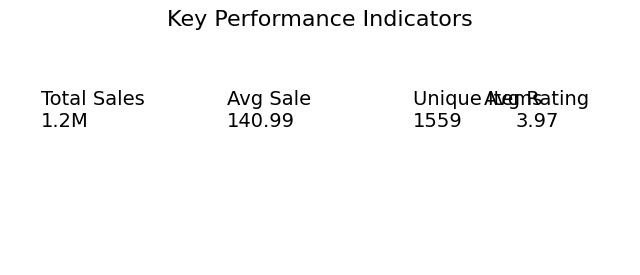

Saved: eda_outputs/kpis.png


In [143]:
import matplotlib.pyplot as plt
import os
os.makedirs("eda_outputs", exist_ok=True)

def human(num):
    for unit in ['','K','M','B']:
        if abs(num) < 1000:
            return f"{num:,.1f}{unit}"
        num /= 1000
    return f"{num:.1f}P"

fig = plt.figure(figsize=(8,3))
plt.axis('off')
plt.title("Key Performance Indicators", fontsize=16)
plt.text(0.05, 0.6, "Total Sales\n" + human(total_sales), fontsize=14)
plt.text(0.35, 0.6, "Avg Sale\n" + f"{avg_sales:,.2f}", fontsize=14)
plt.text(0.65, 0.6, "Unique Items\n" + str(unique_items), fontsize=14)
plt.text(0.85, 0.6, "Avg Rating\n" + f"{avg_rating:.2f}", fontsize=14, ha='center')

kpi_file = "eda_outputs/kpis.png"
fig.savefig(kpi_file, bbox_inches='tight', dpi=150)
plt.show()
print("Saved:", kpi_file)


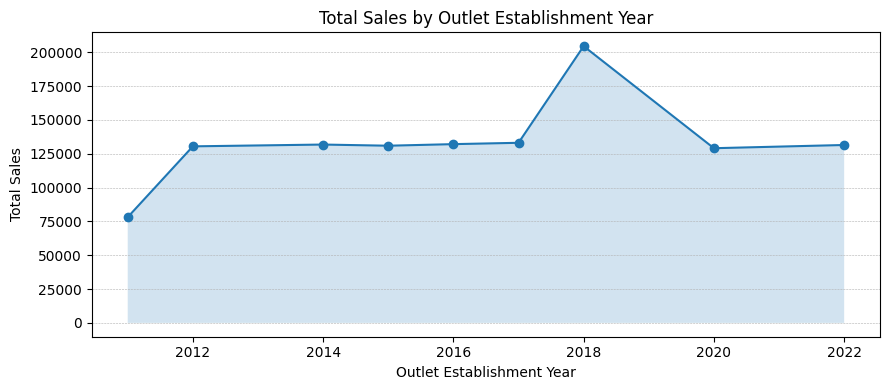

Saved: eda_outputs/sales_by_year.png


In [144]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
years = sales_by_year.index.astype(int)
vals = sales_by_year.values

plt.figure(figsize=(9,4))
plt.plot(years, vals, marker='o')
plt.fill_between(years, vals, alpha=0.2)
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Total Sales by Outlet Establishment Year")
plt.grid(axis='y', linestyle='--', linewidth=0.4)
plt.tight_layout()
fn = "eda_outputs/sales_by_year.png"
plt.savefig(fn, dpi=150)
plt.show()
print("Saved:", fn)


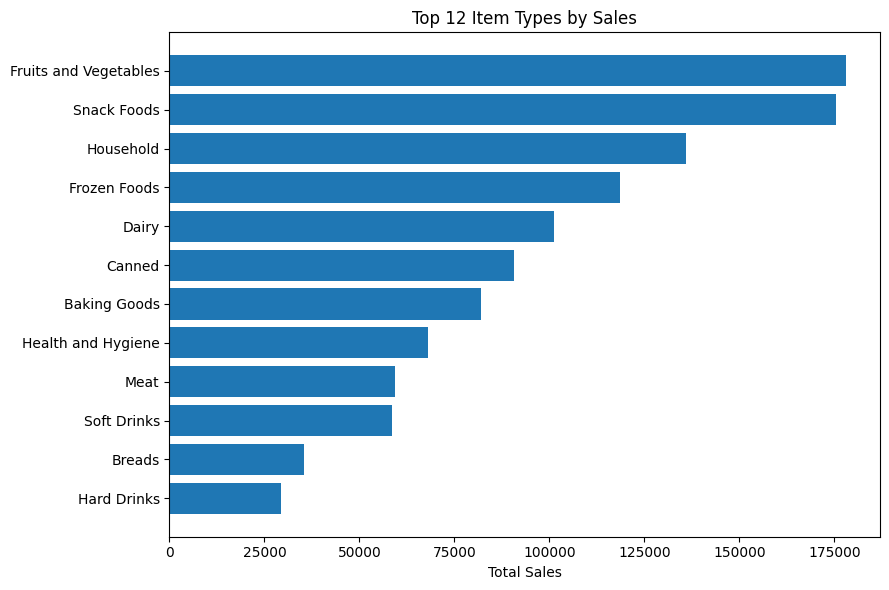

Saved: eda_outputs/top_item_types.png


In [145]:
item_sales = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)
top_n = 12
top = item_sales.head(top_n).sort_values()  # for horizontal plotting (ascending)
plt.figure(figsize=(9,6))
plt.barh(top.index, top.values)
plt.xlabel("Total Sales")
plt.title(f"Top {top_n} Item Types by Sales")
plt.tight_layout()
fn = "eda_outputs/top_item_types.png"
plt.savefig(fn, dpi=150)
plt.show()
print("Saved:", fn)


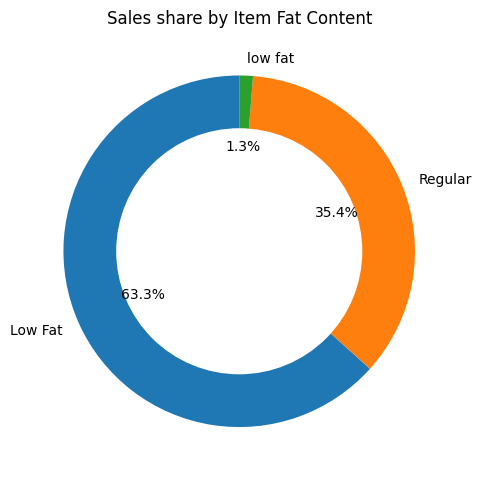

Saved: eda_outputs/fat_content_donut.png


In [146]:
fat_sales = df.groupby('Item Fat Content')['Sales'].sum()
plt.figure(figsize=(5,5))
plt.pie(fat_sales.values, labels=fat_sales.index, autopct='%1.1f%%', startangle=90)
centre = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre)
plt.title("Sales share by Item Fat Content")
plt.tight_layout()
fn = "eda_outputs/fat_content_donut.png"
plt.savefig(fn, dpi=150)
plt.show()
print("Saved:", fn)


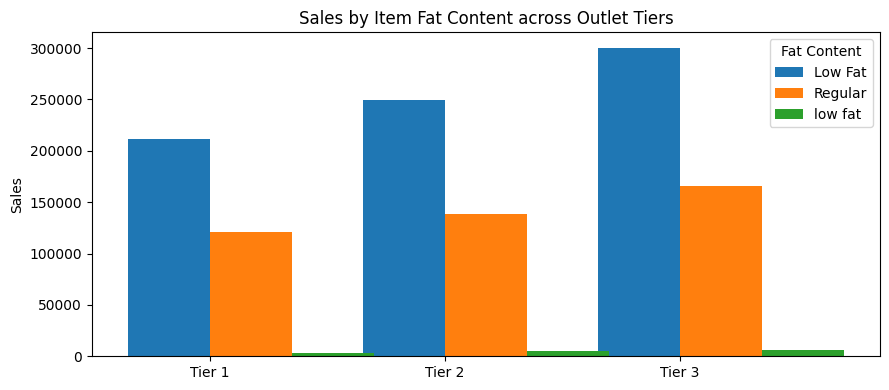

Saved: eda_outputs/fat_by_tier.png


In [150]:
pivot = df.pivot_table(values='Sales', index='Outlet Location Type', columns='Item Fat Content', aggfunc='sum').fillna(0)
pivot = pivot.reindex(['Tier 1','Tier 2','Tier 3'])  # ensure consistent order
ind = range(len(pivot.index))
width = 0.35

plt.figure(figsize=(9,4))
for i,col in enumerate(pivot.columns):
    plt.bar([x + i*width for x in ind], pivot[col].values, width, label=col)
plt.xticks([x + width/2 for x in ind], pivot.index)
plt.ylabel("Sales")
plt.title("Sales by Item Fat Content across Outlet Tiers")
plt.legend(title="Fat Content")
plt.tight_layout()
fn = "eda_outputs/fat_by_tier.png"
plt.savefig(fn, dpi=150)
plt.show()
print("Saved:", fn)


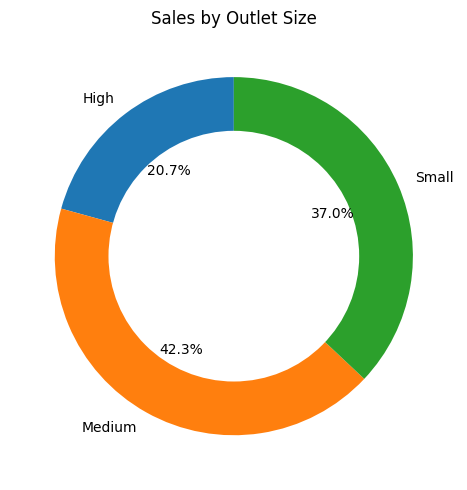

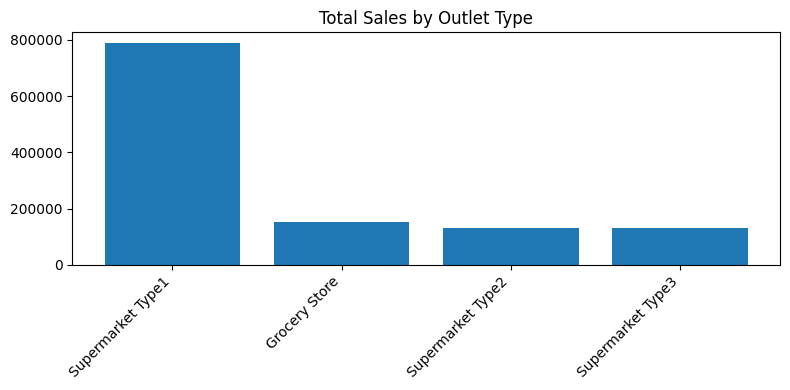

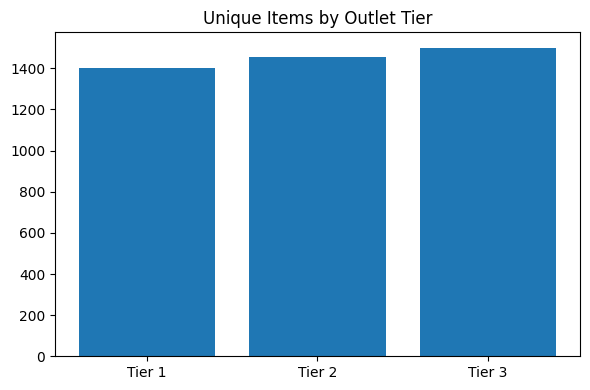

Saved: outlet_size_donut.png, outlet_type_sales.png, items_by_tier.png


In [151]:
# Outlet Size share (donut)
size_sales = df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(5,5))
plt.pie(size_sales.values, labels=size_sales.index, autopct='%1.1f%%', startangle=90)
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white'))
plt.title("Sales by Outlet Size")
plt.tight_layout()
plt.savefig("eda_outputs/outlet_size_donut.png", dpi=150)
plt.show()

# Outlet Type total sales (bar)
outlet_type_sales = df.groupby('Outlet Type')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
plt.bar(outlet_type_sales.index, outlet_type_sales.values)
plt.xticks(rotation=45, ha='right')
plt.title("Total Sales by Outlet Type")
plt.tight_layout()
plt.savefig("eda_outputs/outlet_type_sales.png", dpi=150)
plt.show()

# Unique items per tier
items_by_tier = df.groupby('Outlet Location Type')['Item Identifier'].nunique().reindex(['Tier 1','Tier 2','Tier 3'])
plt.figure(figsize=(6,4))
plt.bar(items_by_tier.index, items_by_tier.values)
plt.title("Unique Items by Outlet Tier")
plt.tight_layout()
plt.savefig("eda_outputs/items_by_tier.png", dpi=150)
plt.show()

print("Saved: outlet_size_donut.png, outlet_type_sales.png, items_by_tier.png")
